In [24]:
#pip install mlxtend #was required in my case, may not be needed in yours

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

#dataset = pd.read_csv('datasets/network-logs.csv')
dataset = pd.read_csv('datasets/R2L-data.csv')

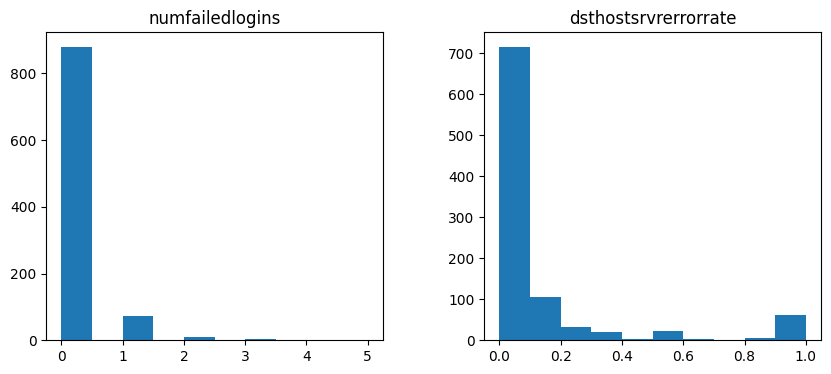

In [27]:
hist_dist = dataset[['numfailedlogins', 'dsthostsrvrerrorrate']].hist(grid=False, figsize=(10,4))

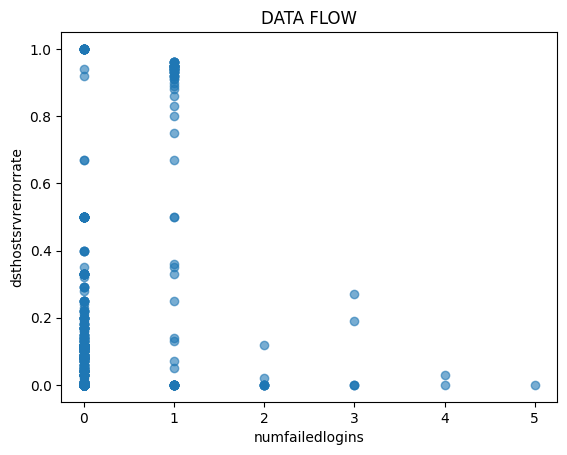

In [28]:
data = dataset[['numfailedlogins', 'dsthostsrvrerrorrate']].values

plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.xlabel('numfailedlogins')
plt.ylabel('dsthostsrvrerrorrate')
plt.title('DATA FLOW')
plt.show()

In [29]:
"""
Anomaly Detection Module
https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/anomaly_detection/gaussian_anomaly_detection.py
"""
from gaussian_anomaly_detection import GaussianAnomalyDetection

gaussian_anomaly_detection = GaussianAnomalyDetection(data)

print('mu param estimation: ')
print(gaussian_anomaly_detection.mu_param)

print('\n')

print('sigma squared estimation: ')
print(gaussian_anomaly_detection.sigma_squared)

mu param estimation: 
[0.12371134 0.11534021]


sigma squared estimation: 
[0.20325221 0.06295128]


In [30]:
targets = dataset['attack'].values.reshape((data.shape[0], 1))
probs = gaussian_anomaly_detection.multivariate_gaussian(data)

(threshold, F1, precision_, recall_, f1_) = gaussian_anomaly_detection.select_threshold(targets, probs)

print('\n')

print('threshold estimation: ')
print(threshold)



threshold estimation: 
0.06638510469848727


[]

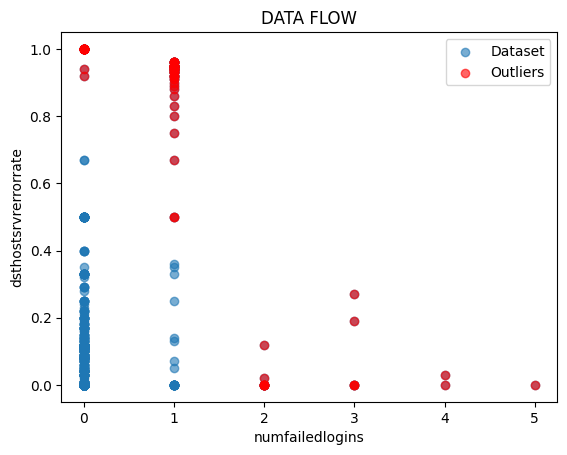

In [31]:
outliers = np.where(probs < threshold)[0]

# Plot original data.
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Dataset')
plt.xlabel('numfailedlogins')
plt.ylabel('dsthostsrvrerrorrate')
plt.title('DATA FLOW')

# Plot the outliers.
plt.scatter(data[outliers, 0], data[outliers, 1], alpha=0.6, c='red', label='Outliers')

# Display plots.
plt.legend()
plt.plot()

In [32]:
print('F1 score: ')
print(F1)

F1 score: 
0.7428571428571429


In [33]:
from sklearn.metrics import roc_curve

FPR, TPR, OPC = roc_curve(targets, probs)

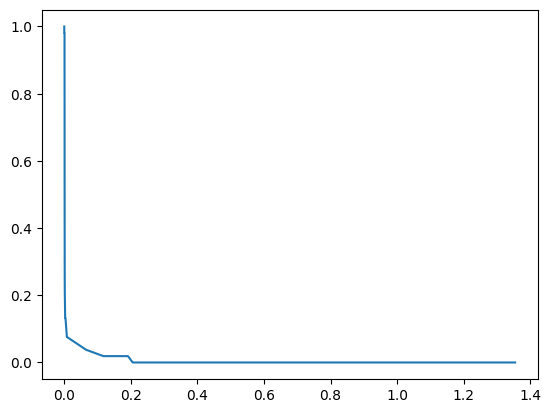

In [34]:
# Plotting Sensitivity
plt.plot(OPC,TPR)

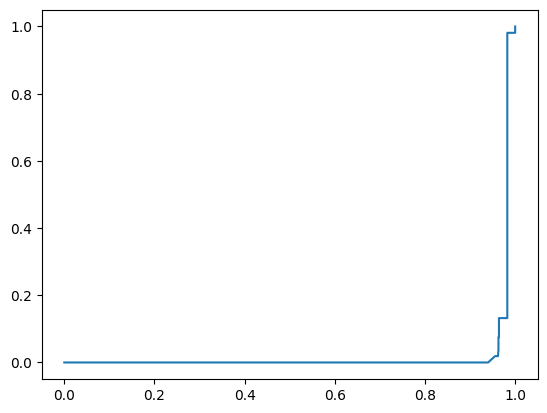

In [35]:
# Plotting ROC curve
plt.plot(FPR,TPR)